In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [2]:
#import the data
USDCAD = yf.Ticker("USDCAD=X")

In [3]:
data = yf.download("USDCAD=X", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Date
2017-01-02    1.34340
2017-01-03    1.34414
2017-01-04    1.34218
2017-01-05    1.32990
2017-01-06    1.32294
Name: Adj Close, dtype: float64

In [5]:
data.tail()

Date
2022-08-04    1.28536
2022-08-05    1.28702
2022-08-08    1.29445
2022-08-09    1.28570
2022-08-10    1.28859
Name: Adj Close, dtype: float64

In [6]:
log_returns = np.log(1 + data.pct_change())

In [7]:
log_returns.tail()

Date
2022-08-04   -0.002665
2022-08-05    0.001291
2022-08-08    0.005756
2022-08-09   -0.006783
2022-08-10    0.002245
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

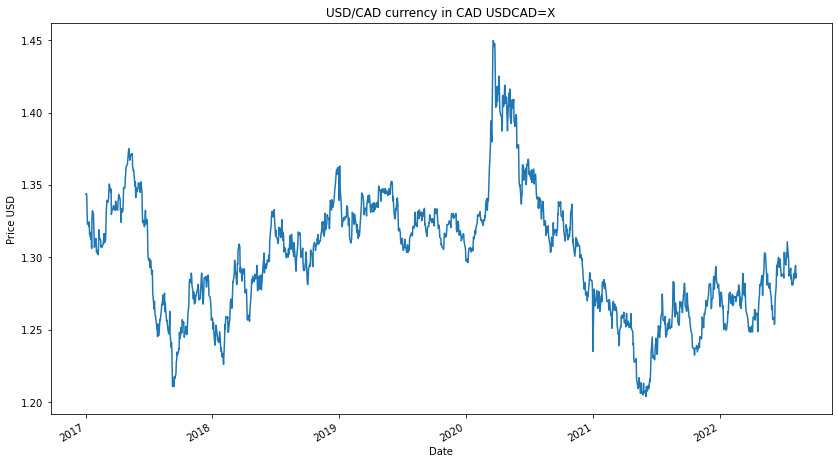

In [8]:
data.plot(figsize=(14,8))
plt.title('USD/CAD currency in CAD USDCAD=X')
plt.ylabel('Price USD')

In [9]:
u = log_returns.mean()
u

-2.8550481878149816e-05

In [10]:
var = log_returns.var()
var

1.9935601931698704e-05

In [11]:
stdev = log_returns.std()
stdev

0.004464930226968693

In [12]:
drift = u - (0.5 * var)
drift

-3.851828284399917e-05

In [13]:
np.array(drift)

array(-3.85182828e-05)

In [14]:
np.array(stdev)

array(0.00446493)

In [15]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [16]:
x = np.random.rand(10,2)
x

array([[0.51836188, 0.38436196],
       [0.07521357, 0.42359749],
       [0.53702767, 0.35859901],
       [0.10560343, 0.47211501],
       [0.31550053, 0.7808268 ],
       [0.32236436, 0.14163853],
       [0.38722217, 0.05762357],
       [0.51331702, 0.34304728],
       [0.67770991, 0.04493084],
       [0.02161416, 0.74540264]])

In [17]:
norm.ppf(x)

array([[ 0.04604266, -0.29404447],
       [-1.43802438, -0.19269866],
       [ 0.09294826, -0.3622061 ],
       [-1.25025379, -0.06995431],
       [-0.48031833,  0.77498861],
       [-0.4610974 , -1.07298673],
       [-0.2865664 , -1.57504034],
       [ 0.03338702, -0.40416069],
       [ 0.46130448, -1.69612778],
       [-2.02149721,  0.6600921 ]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.3624756 , -1.18872024],
       [ 0.40850946, -0.21225849],
       [ 0.58527187, -0.49706054],
       [ 1.32901244,  1.35069951],
       [ 0.57454189,  0.28182426],
       [-0.60966855, -0.41633102],
       [ 1.24678667, -0.89646517],
       [ 1.17768372,  0.31227682],
       [-0.43716199,  1.15519523],
       [ 1.01950985,  0.64080099]])

In [19]:
t_intervals = 120
interations = 500

In [20]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.00036094, 0.9971383 , 0.99826557, ..., 0.99775912, 1.00685607,
        0.99803776],
       [1.00520879, 0.99791732, 1.00165477, ..., 0.99396681, 1.00333343,
        1.00043958],
       [0.99543408, 0.99372929, 0.99841107, ..., 1.00126987, 1.00462062,
        1.00333991],
       ...,
       [1.00396313, 1.00240131, 0.99194468, ..., 1.00563756, 1.00405615,
        1.00635676],
       [0.99497307, 1.0021022 , 0.99947904, ..., 1.00330179, 1.00188653,
        1.00242644],
       [0.99786493, 0.98580216, 1.00003316, ..., 1.00329935, 0.99108901,
        0.99872365]])

In [21]:
s_zero = data.iloc[-1]
s_zero

1.2885899543762207

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0] = s_zero
price_list

array([[1.28858995, 1.28858995, 1.28858995, ..., 1.28858995, 1.28858995,
        1.28858995],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [26]:
price_list

array([[1.28858995, 1.28858995, 1.28858995, ..., 1.28858995, 1.28858995,
        1.28858995],
       [1.29530194, 1.28590623, 1.29072228, ..., 1.28081565, 1.29288538,
        1.28915639],
       [1.2893877 , 1.27784269, 1.28867141, ..., 1.28244212, 1.29885931,
        1.29346205],
       ...,
       [1.29434234, 1.25121121, 1.33258537, ..., 1.33209757, 1.32802764,
        1.30813197],
       [1.28783578, 1.25384151, 1.33189114, ..., 1.33649587, 1.33053301,
        1.31130608],
       [1.28508616, 1.23603967, 1.33193531, ..., 1.34090544, 1.31867664,
        1.3096324 ]])

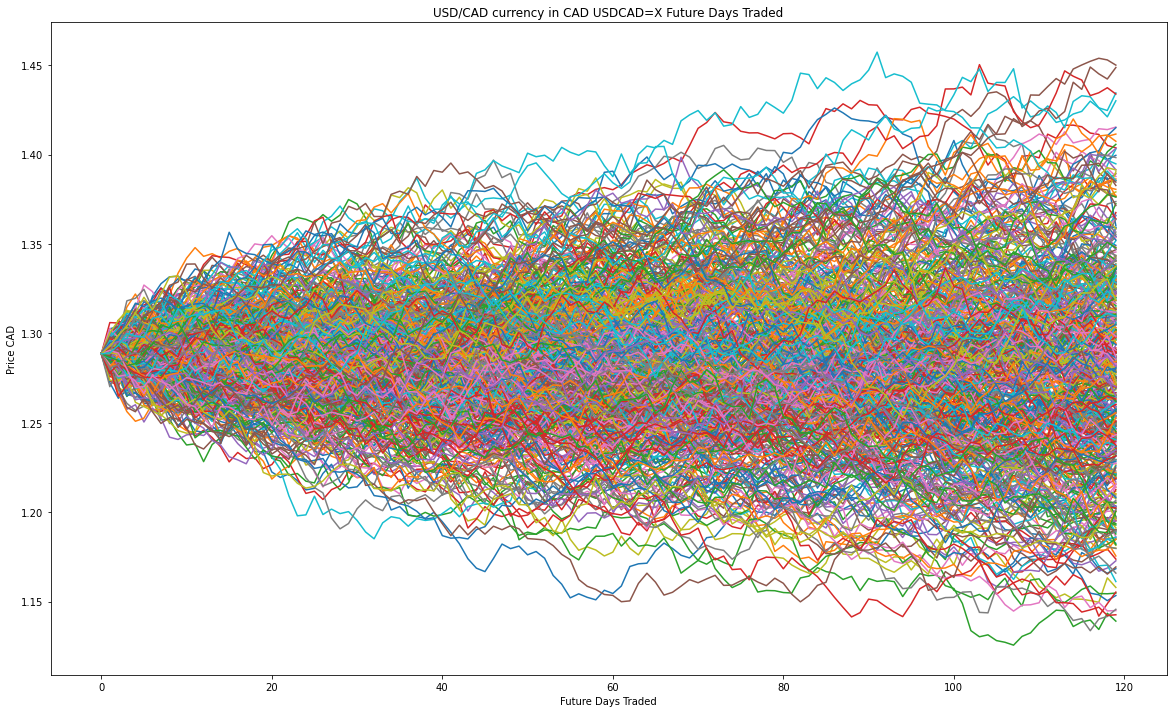

In [28]:
plt.figure(figsize=(20,12))
plt.title('USD/CAD currency USDCAD=X Future Days Traded')
plt.xlabel('Future Days Traded')
plt.ylabel('Price CAD')
plt.plot(price_list)